# Forecasting Models : SMA, WMA, SES, ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
airline = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Simple Moving Average

Moving Average 구하는 방법에 대해서는 앞서 rolling mean 을 통해 알아본 바 있습니다.

In [4]:
airline['6M SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12M SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [5]:
airline.head()

,Thousands of Passengers,6M SMA,12M SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


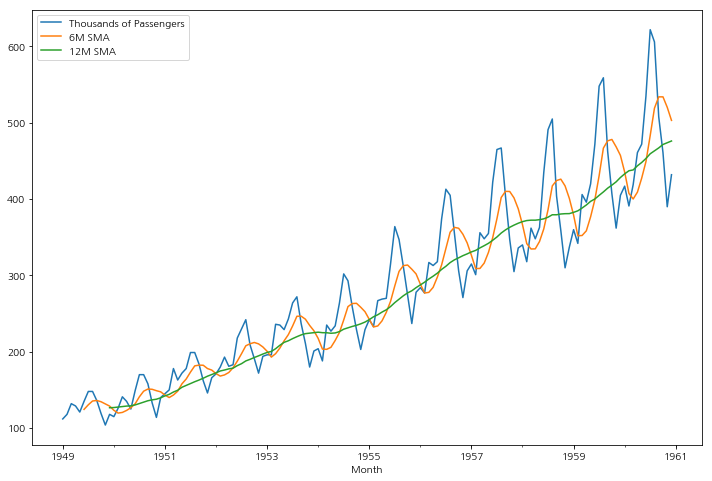

In [6]:
airline.plot(figsize=(12,8))

## Weighted Moving Averagem

In [7]:
airline['WMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline['WMA6'] = airline['Thousands of Passengers'].ewm(span=6).mean()

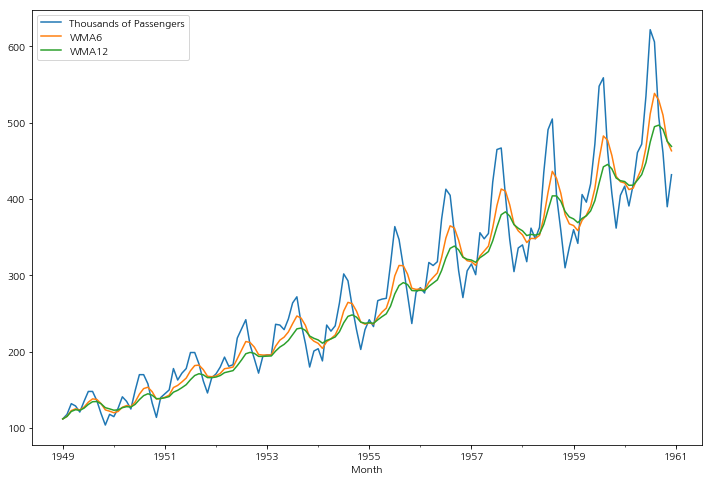

In [8]:
airline[['Thousands of Passengers', 'WMA6','WMA12']].plot(figsize=(12,8))

## Simple Exponential Smoothing

In [9]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [10]:
train = airline[:'1959']
test = airline['1960':]

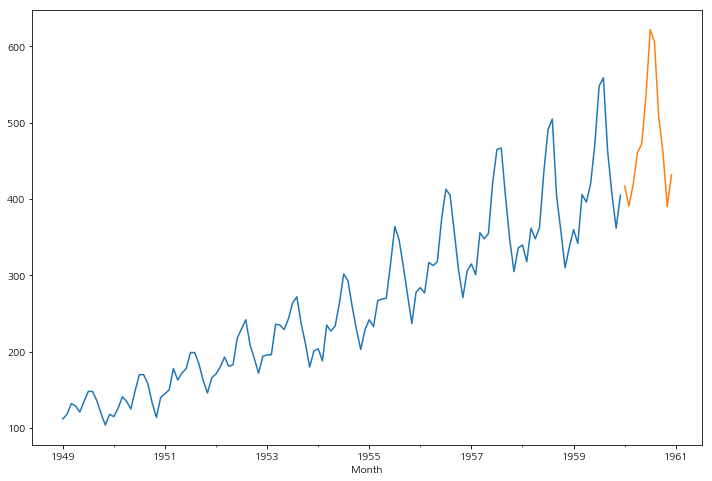

In [11]:
train['Thousands of Passengers'].plot(figsize=(12,8))
test['Thousands of Passengers'].plot()

In [12]:
ses_model = SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))

In [13]:
ses_result = ses_model.fit()

In [14]:
y_hat = test.copy()

In [15]:
y_hat['SES'] = ses_result.forecast(len(test))

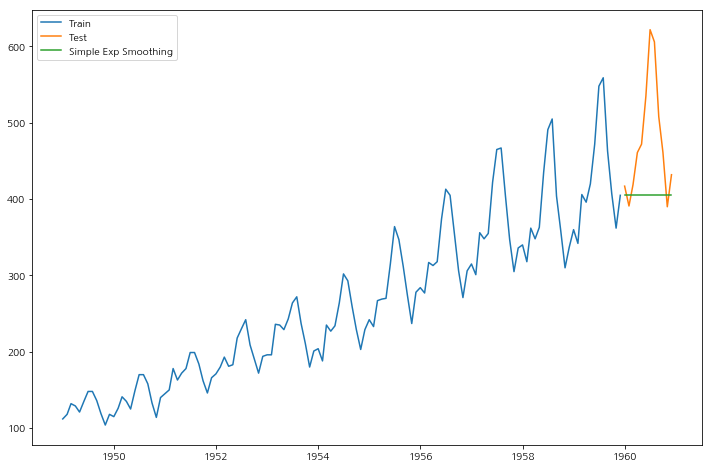

In [16]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')
plt.legend()

In [17]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['SES']))

In [18]:
rmse

102.97653454387881

## Holt's Method

In [19]:
from statsmodels.tsa.api import Holt

In [20]:
holt_model = Holt(np.asarray(train['Thousands of Passengers']))

In [21]:
holt_result = holt_model.fit()

In [22]:
y_hat['HOLT'] = holt_result.forecast(len(test))

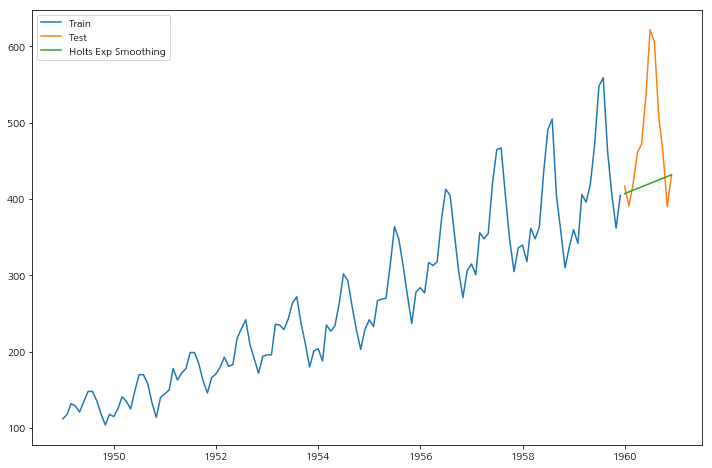

In [23]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['HOLT'], label='Holts Exp Smoothing')
plt.legend()

In [24]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['HOLT']))

In [25]:
rmse

92.6663528028185

## Holt-Winters Method

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing

In [27]:
winter_model = ExponentialSmoothing(
    np.asarray(train['Thousands of Passengers']),
    seasonal_periods=12, trend='add', seasonal='add'
)

In [28]:
winter_result = winter_model.fit()

In [29]:
y_hat['WINTER'] = winter_result.forecast(len(test))

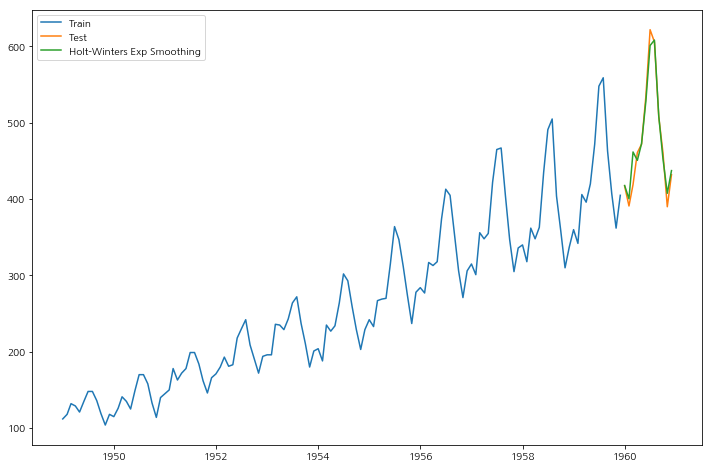

In [30]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['WINTER'], label='Holt-Winters Exp Smoothing')
plt.legend()

In [31]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['WINTER']))

In [32]:
rmse

15.57083049822115

## ARIMA

In [33]:
import statsmodels.api as sm

In [34]:
# ARIMA(p,d,q)(P,D,Q)m

arima = sm.tsa.statespace.SARIMAX(train['Thousands of Passengers'],
                                  order=(2,1,1),
                                  seasonal_order=(0,1,0,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

/home/lyle/anaconda3/envs/tsa/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [35]:
arima_result = arima.fit()

In [36]:
y_hat['ARIMA'] = arima_result.predict(start='1960-01-01', end='1960-12-01', dynamic=True)

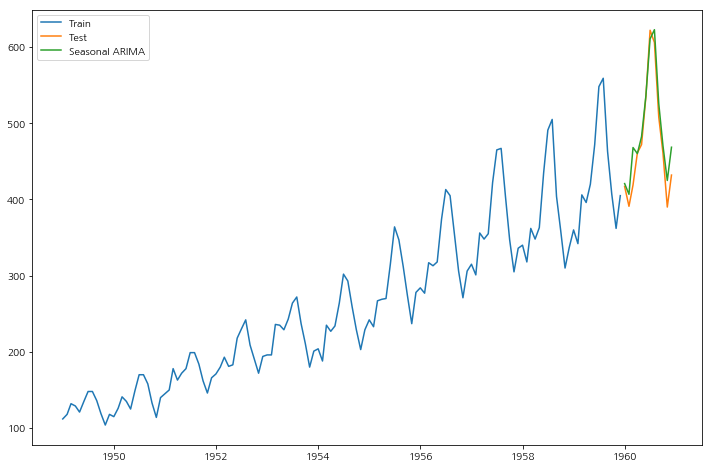

In [37]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

In [38]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['ARIMA']))

In [39]:
rmse

22.65096415638221